In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Bank_Churn_Modelling.csv')

In [4]:
# removed unused columns
df.drop(axis='columns', labels=['CustomerId', 'RowNumber', 'Surname'], inplace=True)

In [7]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [6]:
#convert male/female to 0/1
df.replace({'Female': 1, 'Male': 0}, inplace=True)

# convert categorical columns as one-hot encoding
df = pd.get_dummies(df, columns=['Geography'], dtype=np.uint8)

C:\Users\user\AppData\Local\Temp\ipykernel_9036\2817153771.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Female': 1, 'Male': 0}, inplace=True)


In [8]:
# scale range columns to make them easy for training
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [9]:
#split data into training and testing
from sklearn.model_selection import train_test_split

X = df.drop(axis='columns', labels='Exited')
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [10]:
X_train.shape

(8000, 12)

In [11]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(12,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') # sigmoid because we want to predict 0 or 1
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', # because we are predicting 0 or 1 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7909 - loss: 0.5273
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7943 - loss: 0.4854
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7999 - loss: 0.4602
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7960 - loss: 0.4644
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8079 - loss: 0.4493
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.4482
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8088 - loss: 0.4449
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8037 - loss: 0.4424
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8189 - loss: 0.4273
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8127 - loss: 0.4324
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.4479
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [12]:
predictions = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [13]:
samples = 10

X_test_sample = X_test[:samples]
pred_sample = [np.round(i) for i in predictions[:samples]]
test_sample = y_test[:samples]

for i in range(samples):
    print (f"{X_test_sample.index[i]}:{pred_sample[i]} {'=' if pred_sample[i] == test_sample.values[i] else '!='} {test_sample.index[i]}:{test_sample.values[i]}")

7054:[0.] = 7054:0
442:[0.] = 442:0
3954:[0.] = 3954:0
2288:[0.] = 2288:0
3196:[0.] = 3196:0
6178:[0.] = 6178:0
8351:[0.] = 8351:0
5658:[0.] != 5658:1
2065:[0.] = 2065:0
413:[1.] = 413:1


[[1535   60]
 [ 233  172]]


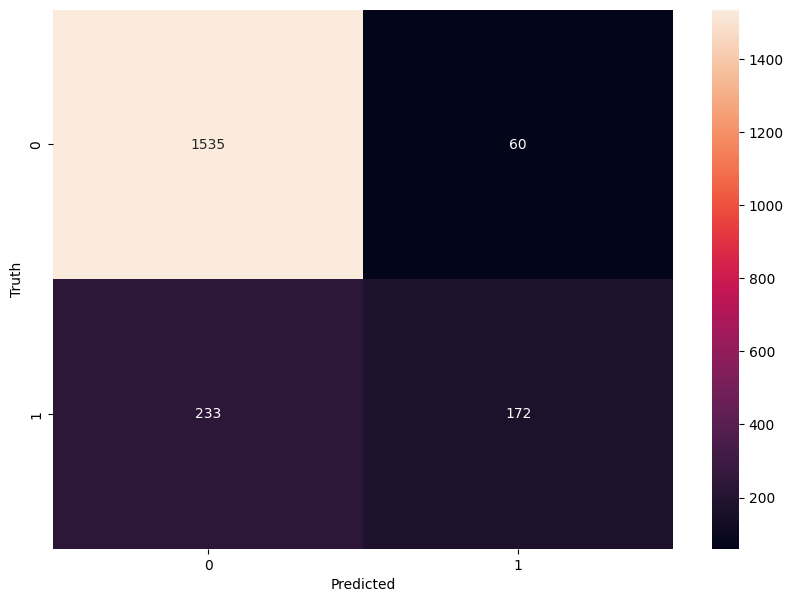

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

print(confusion_matrix(y_test, np.round(predictions)))

plt.figure(figsize=(10, 7))
sn.heatmap(confusion_matrix(y_test, np.round(predictions)), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()